# Wordgame Word2Vec features
Welcome to the second notebook in my wordgame project. In this notebook our goal is to extract a the similarity of the word pairs based on Word2Vec. Word2Vec is a model.. 

a) open tail
b) compute sim 
1) Compare sim with sim of random word pairs (shift) 
2) Plot all sim dists 
3) Plot specific. word 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/processed/wordgame_20170628_basicfeatures.csv', dtype={'nt': np.bool, 'word1':str, 'word2':str})

df.head()

,author,word1,word2,source,sourceID,nt,len1,len2,d_len,edit,n_edit
0,1203,jailed,imprisoned,ecig,4,True,6,10,4,7,0.051471
1,5839,me,liverbird,wrongplanet,9,False,2,9,7,8,0.094118
2,2962,reach,up,sas,7,True,5,2,3,5,0.172414
3,1066,owie,band-aid,ecig,4,True,4,8,4,7,0.087500
4,5006,water,river,wrongplanet,9,False,5,5,0,3,0.060000


In [45]:
from gensim.models.keyedvectors import KeyedVectors

w2v_model = KeyedVectors.load_word2vec_format('../data/external/GoogleNews-vectors-negative300.bin', binary=True)
print('Loaded word embeddings')

Loaded word embeddings


In [46]:
def similarity(r):

	if (r.wv1 is not 0) & (r.wv2 is not 0):
		return w2v_model.similarity(r.word1, r.word2)
	else:
		return 100

    
def calcVec(x): 
	if (x in w2v_model.vocab):
		return w2v_model.word_vec(x)
	else:
		return 0 

    
df['wv1'] = df['word1'].apply(lambda x:calcVec(x))
df['wv2'] = df['word2'].apply(lambda x:calcVec(x))

#wvarr1 = []    
#for vec in df.wv1:
#	wvarr1.append(vec)
    
#wvarr2 = []    
#for vec in df.wv2:
#	wvarr2.append(vec)
    
#print(wvarr1)

df['sim'] = df.apply(similarity, axis=1) 
print("finished")

finished


In [42]:
del w2v_model

NameError: name 'w2v_model' is not defined

In [47]:
# remove a words (pairs) that are not in vocabulary
df = df[df['sim'] <= 1.0]
print("Number of remaining word pairs: " +str(len(df)))
print("Mean similariy score: " +str(df['sim'].mean()))

Number of remaining word pairs: 272556
Mean similariy score: 0.268534643984


81% of pairs in vocabulary. sim = 0.27

Now random..

In [12]:
#
df['word2'] = df['word2'].shift(1)

df['simr'] = df.apply(similarity, axis=1)
#and.. shift back!
df['word2'] = df['word2'].shift(-1)

# remove a words (pairs) that are not in vocabulary
df = df[df['simr'] <= 1.0]
print("Number of remaining word pairs: " +str(len(df)))
print("Mean similariy score: " +str(df['simr'].mean()))

Number of remaining word pairs: 272557
Mean similariy score: 0.0820050718481


sim = 3.5 times lower

cats 'n dogs

In [61]:
word1_list = ['music','water']
word2_list = ['music','water']
tdf = df[(df['word1'].isin(word1_list)) | (df['word2'].isin(word2_list))]
#tdf = df

Number of NT word pairs: 1687
	Mean similarity: 0.281617020199
Number of ASD word pairs: 541
	Mean similarity: 0.304833993535


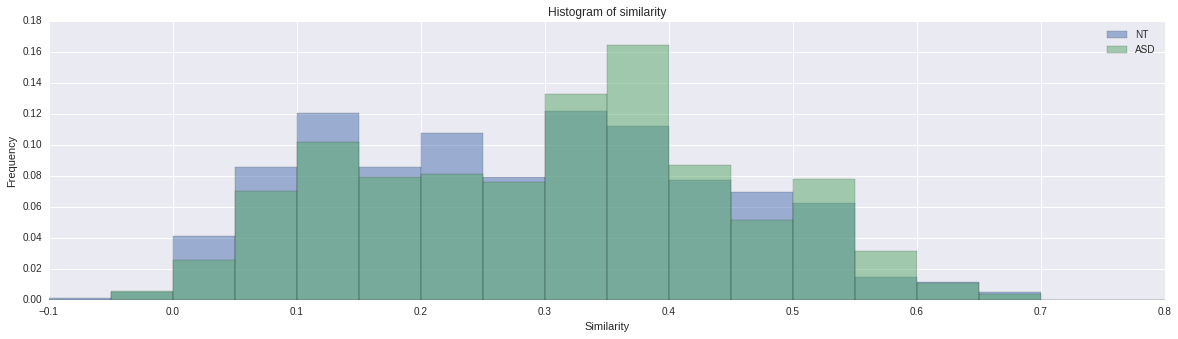

In [73]:
nt = tdf[tdf['nt']].sim
asd = tdf[tdf['nt']==False].sim

print("Number of NT word pairs: " + str(len(nt)))
print("\tMean similarity: " + str(nt.mean()))
print("Number of ASD word pairs: " + str(len(asd)))
print("\tMean similarity: " + str(asd.mean()))

#plot
w1 = np.ones_like(nt)/len(nt)
w2 = np.ones_like(asd)/len(asd)
bins = np.arange(-2,2,0.05)

plt.figure(figsize=(20, 5))
plt.hist(nt, bins=bins, alpha=0.5, label="NT", weights=w1)
plt.hist(asd, bins=bins, alpha=0.5, label="ASD", weights=w2)
plt.title('Histogram of similarity')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([-0.1,0.8])
plt.show()

1000 assocations! Still differences! I think that is good? or overfitting...? 

What to do?? 


In [ ]:
a = tdf[tdf['author']%5!=0].sim
b = tdf[tdf['author']%5==0].sim

print("Number of A word pairs: " + str(len(a)))
print("\tMean similarity: " + str(nt.mean()))
print("Number of B word pairs: " + str(len(b)))
print("\tMean similarity: " + str(asd.mean()))

#plot
w1 = np.ones_like(a)/len(a)
w2 = np.ones_like(b)/len(b)
bins = np.arange(-2,2,0.05)

plt.figure(figsize=(20, 5))
plt.hist(a, bins=bins, alpha=0.5, label="A", weights=w1)
plt.hist(b, bins=bins, alpha=0.5, label="B", weights=w2)
plt.title('Histogram of similarity')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([-0.1,0.8])
plt.show()

# TSNE



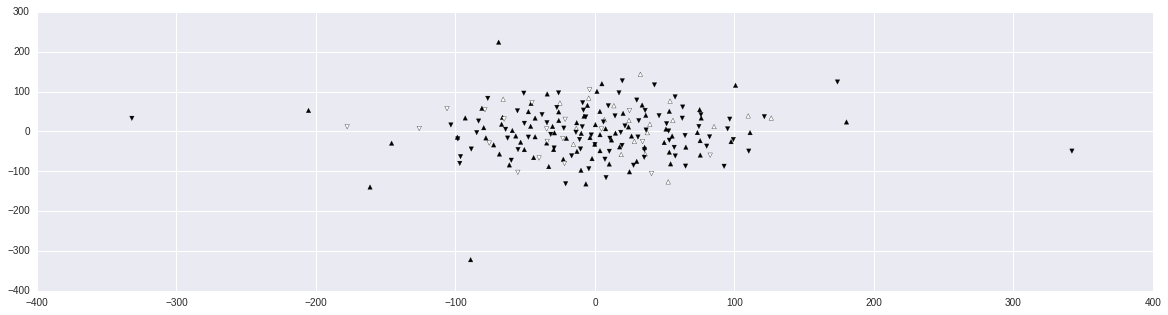

In [168]:
from sklearn.manifold import TSNE

#print(tdf[tdf['nt']].head(20))

arr1 = []
for vec in df.wv1:
    if(len(arr1) < 100):
        arr1.append(vec)
c1 = []
for b in df.nt:
    if(len(c1) < 100):
        c1.append(b)
        
arr2 = []        
for vec in df.wv2:
    if(len(arr2) < 100):
        arr2.append(vec)        

c2 = []
for b in df.nt:
    if(len(c2) < 100):
        c2.append(b)
#print(arr)

#mtx = [calcVec("london"), calcVec("england"), calcVec("paris"), calcVec("france"), calcVec("madrid"), calcVec("spain"), calcVec("brussels"), calcVec("belgium")]
#classes = [0,1,0,1,0,1,0,1]
#print(mtx)

red_mtx1 = TSNE(random_state=42).fit_transform(arr1) 
red_mtx2 = TSNE(random_state=42).fit_transform(arr2) 

plt.figure(figsize=(20, 5))
plt.scatter(red_mtx1[:,0], red_mtx1[:,1], marker='^',c=c1)
plt.scatter(red_mtx2[:,0], red_mtx2[:,1], marker='v',c=c2)
for i in range(0,100):
    plt.plot(red_mtx1[i,0], red_mtx1[i,1])
axes = plt.gca()
#axes.set_xlim([-0.0003,0.0003])
#axes.set_ylim([-0.0005,0.0004])
plt.show()